In [1]:
from IPython.core.display import HTML
HTML(r"""
<style>
    * {
        font-family: monospace;
        font-size: 12px;
        line-height: normal;
    }
</style>
""")

In [62]:
import pandas as pd
import numpy as np

# Read dataframe

In [99]:
df_dataset = pd.read_csv('.//data//dataset.csv')
df_dataset.head(n=10)

,msisdn,mother_system,af_partition_date,appsflyer_id,af_adset,campaign,event_name,event_time,media_source,original_url,quantity,check
0,8.490192e+10,VTP,20220326,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,vtm_transaction_s2s_success,2022-03-26T11:16:28.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,40,1
1,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,qr_start,2022-03-04T19:47:18.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,49,0
2,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T19:47:40.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,14,0
3,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,94,0
4,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,click_tab_bar_screen_home,2022-03-04T19:47:17.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,4,0
5,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,97,0
6,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:39.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,76,0
7,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_start,2022-03-04T20:40:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,20,1
8,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T20:41:03.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,46,0
9,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,55,0


In [100]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156517 entries, 0 to 156516
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   msisdn             102821 non-null  float64
 1   mother_system      102821 non-null  object 
 2   af_partition_date  156517 non-null  int64  
 3   appsflyer_id       111084 non-null  object 
 4   af_adset           155700 non-null  object 
 5   campaign           156429 non-null  object 
 6   event_name         156517 non-null  object 
 7   event_time         156517 non-null  object 
 8   media_source       156517 non-null  object 
 9   original_url       156265 non-null  object 
 10  quantity           156517 non-null  int64  
 11  check              156517 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 14.3+ MB


# 1. Strucure Investigation

In [104]:
df_dataset.shape

(156517, 12)

In [105]:
pd.value_counts(df_dataset.dtypes)

object     8
int64      3
float64    1
dtype: int64

## 1.1 Structure of non-numerical features

In [106]:
df_dataset.select_dtypes(exclude='number').head(10)

,mother_system,appsflyer_id,af_adset,campaign,event_name,event_time,media_source,original_url
0,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,vtm_transaction_s2s_success,2022-03-26T11:16:28.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
1,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,qr_start,2022-03-04T19:47:18.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
2,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T19:47:40.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
3,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
4,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,click_tab_bar_screen_home,2022-03-04T19:47:17.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
5,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
6,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:39.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
7,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_start,2022-03-04T20:40:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
8,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T20:41:03.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
9,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...


In [107]:
df_dataset.head(n=10)

,msisdn,mother_system,af_partition_date,appsflyer_id,af_adset,campaign,event_name,event_time,media_source,original_url,quantity,check
0,8.490192e+10,VTP,20220326,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,vtm_transaction_s2s_success,2022-03-26T11:16:28.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,40,1
1,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,qr_start,2022-03-04T19:47:18.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,49,0
2,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T19:47:40.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,14,0
3,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,94,0
4,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,click_tab_bar_screen_home,2022-03-04T19:47:17.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,4,0
5,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,97,0
6,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:39.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,76,0
7,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_start,2022-03-04T20:40:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,20,1
8,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T20:41:03.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,46,0
9,8.490192e+10,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,55,0


In [108]:
"""Convert msisdn column from float to str
"""
df_dataset['msisdn'] = df_dataset['msisdn'].astype(np.float).astype('Int64').astype(str)
df_dataset.head(n=10)

,msisdn,mother_system,af_partition_date,appsflyer_id,af_adset,campaign,event_name,event_time,media_source,original_url,quantity,check
0,84901917170,VTP,20220326,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,vtm_transaction_s2s_success,2022-03-26T11:16:28.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,40,1
1,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,qr_start,2022-03-04T19:47:18.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,49,0
2,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T19:47:40.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,14,0
3,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,94,0
4,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,click_tab_bar_screen_home,2022-03-04T19:47:17.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,4,0
5,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,97,0
6,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:39.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,76,0
7,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_start,2022-03-04T20:40:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,20,1
8,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T20:41:03.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,46,0
9,84901917170,VTP,20220304,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...,55,0


In [109]:
df_dataset.select_dtypes(exclude='number').head(10)

,msisdn,mother_system,appsflyer_id,af_adset,campaign,event_name,event_time,media_source,original_url
0,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,vtm_transaction_s2s_success,2022-03-26T11:16:28.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
1,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,qr_start,2022-03-04T19:47:18.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
2,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T19:47:40.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
3,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
4,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,click_tab_bar_screen_home,2022-03-04T19:47:17.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
5,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T19:47:12.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
6,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:39.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
7,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_start,2022-03-04T20:40:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
8,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,login_success,2022-03-04T20:41:03.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...
9,84901917170,VTP,1646382907280-3863150,GIAONH1_KDVTPAY_VTP_KTM,VTPOST_BH,transfer_success,2022-03-04T20:41:56.000+07:00,VTPOST,https://vtmoney.onelink.me/314y?pid=VTPOST&c=V...


In [110]:
df_dataset.describe(exclude='number')

,msisdn,mother_system,appsflyer_id,af_adset,campaign,event_name,event_time,media_source,original_url
count,156517,102821,111084,155700,156429,156517,156517,156517,156265
unique,1014,3,1098,2050,45,83,58520,5,4644
top,<NA>,VTP,1646983415889-630724921645255252,LANHNT_NDH_HKD,vtpost_bh,click,2022-03-04T07:50:25.000+07:00,BHTT,https://vtmoney.onelink.me/314y?pid=BHTT&c=vtp...
freq,53696,68592,13769,13869,115391,45433,720,59199,13863


## 1.2 Structure of numerical features

In [111]:
# For each numerical feature compute number of unique entities
unique_values = df_dataset.select_dtypes(include='number').nunique().sort_values()
type(unique_values)

pandas.core.series.Series

In [112]:
unique_values

check                 2
af_partition_date    31
quantity             99
dtype: int64

<AxesSubplot:title={'center':'Unique values per features'}>

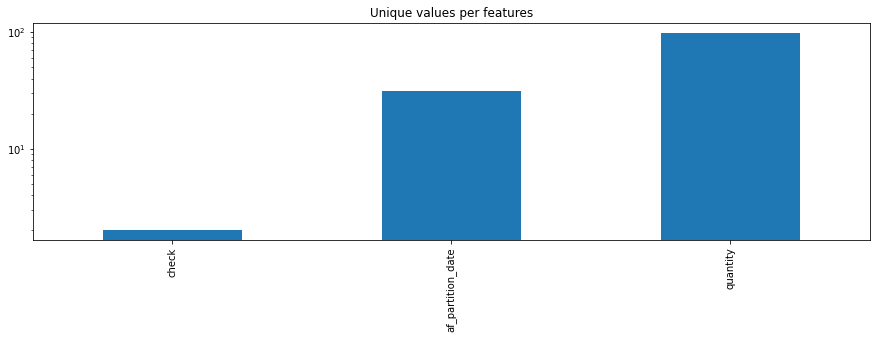

In [113]:
unique_values.plot.bar(logy=True, figsize=(15, 4), title='Unique values per features')

In [114]:
df_dataset.describe(include='number')

,af_partition_date,quantity,check
count,1.565170e+05,156517.000000,156517.000000
mean,2.022032e+07,49.915236,0.497211
std,6.387248e+00,28.541768,0.499994
min,2.022030e+07,1.000000,0.000000
25%,2.022031e+07,25.000000,0.000000
50%,2.022032e+07,50.000000,0.000000
75%,2.022032e+07,75.000000,1.000000
max,2.022033e+07,99.000000,1.000000


## 2. Quantity Investigation

## 2.1 Duplicates

In [115]:
n_dups = df_dataset.duplicated().sum()
n_dups

13751

In [118]:
df_dataset.shape

(156517, 12)

In [119]:
li_cols = df_dataset.columns
df_dataset = df_dataset.drop_duplicates(subset=li_cols)
df_dataset.shape

(142766, 12)

## 2.2 Missing values

In [120]:
df_dataset.isnull().sum()

msisdn                   0
mother_system        49959
af_partition_date        0
appsflyer_id         41698
af_adset               744
campaign                87
event_name               0
event_time               0
media_source             0
original_url           252
quantity                 0
check                    0
dtype: int64

## 2.2.1 Per sample

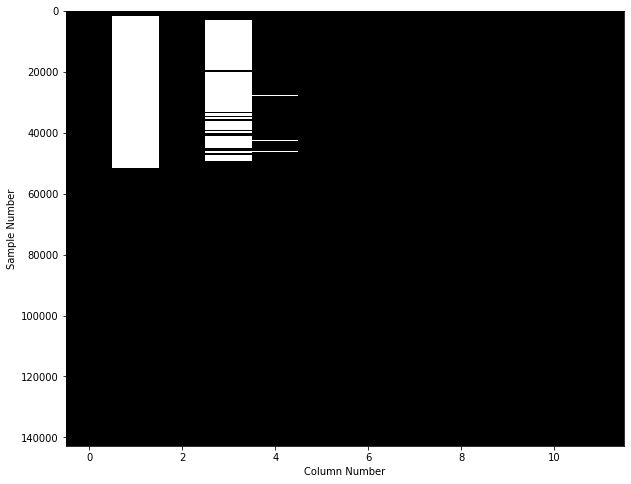

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df_dataset.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

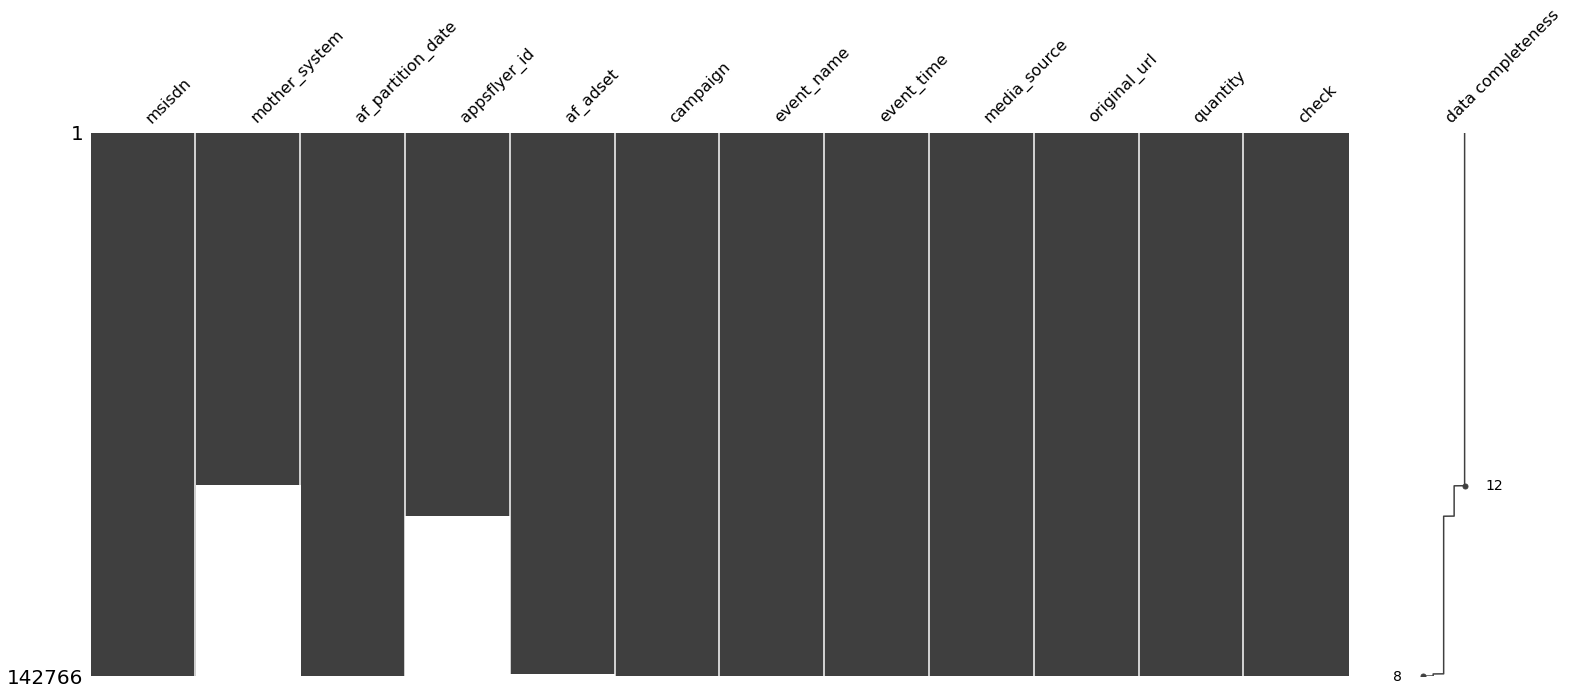

In [129]:
import missingno as msno

msno.matrix(df_dataset, labels=True, sort="descending");

## 2.2.2 Per feature

In [139]:
df_dataset.isna().mean()

msisdn               0.000000
mother_system        0.349936
af_partition_date    0.000000
appsflyer_id         0.292072
af_adset             0.005211
campaign             0.000609
event_name           0.000000
event_time           0.000000
media_source         0.000000
original_url         0.001765
quantity             0.000000
check                0.000000
dtype: float64

<AxesSubplot:title={'center':'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

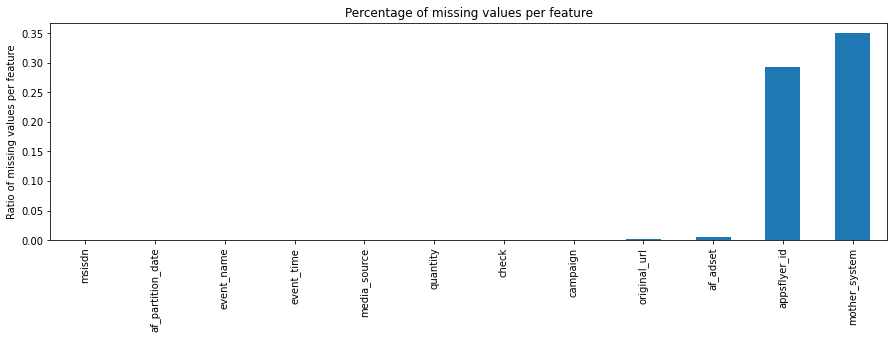

In [138]:
df_dataset.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

## 2.3.1 Numerical features

To plot this global view of the dataset, at least for the numerical features, you can use pandas' .plot() function and combine it with the following parameters:

- lw=0: lw stands for line width. 0 means that we don't want to show any lines
- marker=".": Instead of lines, we tell the plot to use . as markers for each data point
- subplots=True: subplots tells pandas to plot each feature in a separate subplot
- layout=(-1, 4): This parameter tells pandas how many rows and columns to use for the subplots. The -1 means "as many as needed", while the 2 means to use 2 columns per row.
- figsize=(15, 30), markersize=1: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.

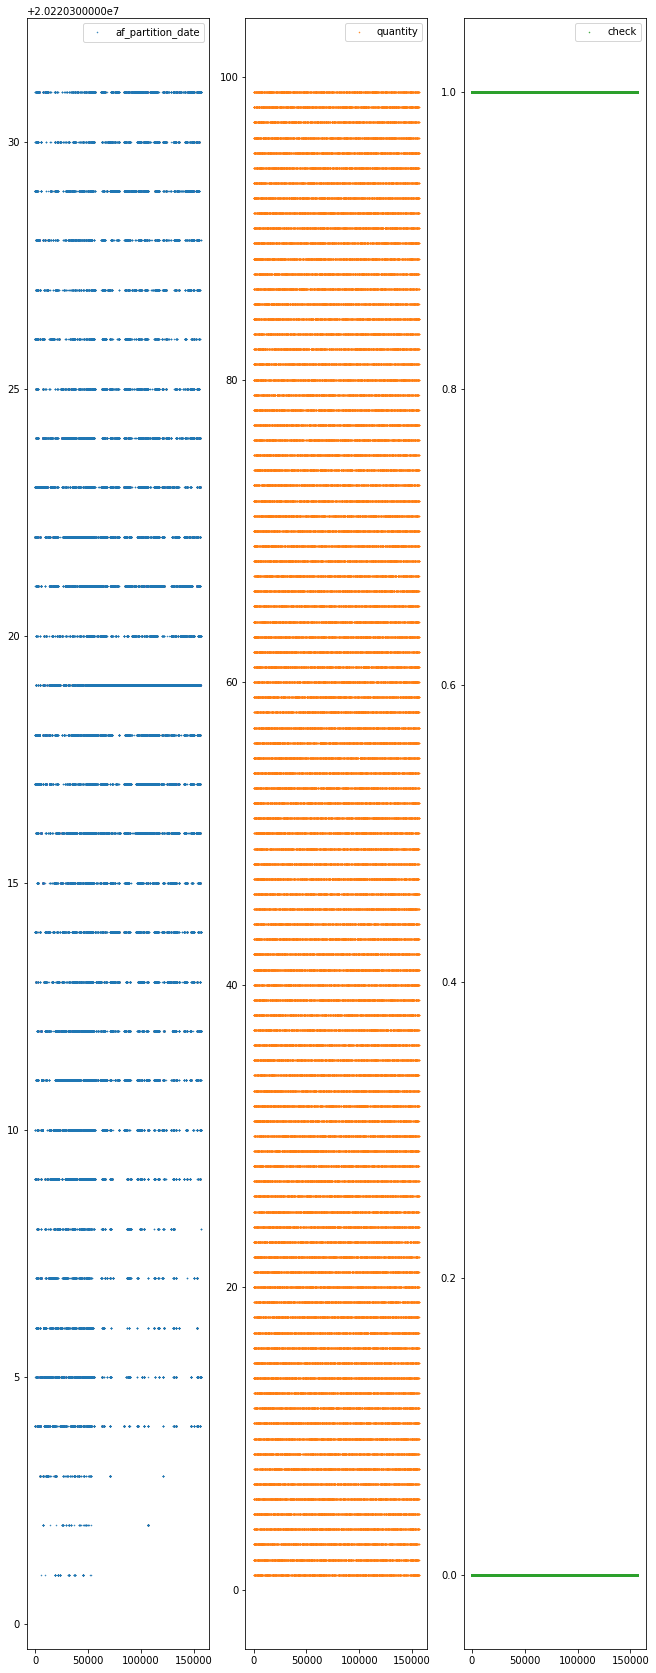

In [141]:
df_dataset.plot(lw=0,
                marker=".",
                subplots=True,
                layout=(-1, 4),
                figsize=(15, 30),
                markersize=1);

## 2.3.3 Non-numerical features

In [143]:
# Extract descriptive properties of non-numerical features
df_dataset.describe(exclude=["number", "datetime"])

,msisdn,mother_system,appsflyer_id,af_adset,campaign,event_name,event_time,media_source,original_url
count,142766,92807,101068,142022,142679,142766,142766,142766,142514
unique,1014,3,1098,2050,45,83,58520,5,4644
top,<NA>,VTP,1646983415889-630724921645255252,LANHNT_NDH_HKD,vtpost_bh,click,2022-03-19T22:02:53.000+07:00,BHTT,https://vtmoney.onelink.me/314y?pid=BHTT&c=vtp...
freq,49959,61553,11276,11376,104387,41698,209,51802,11370


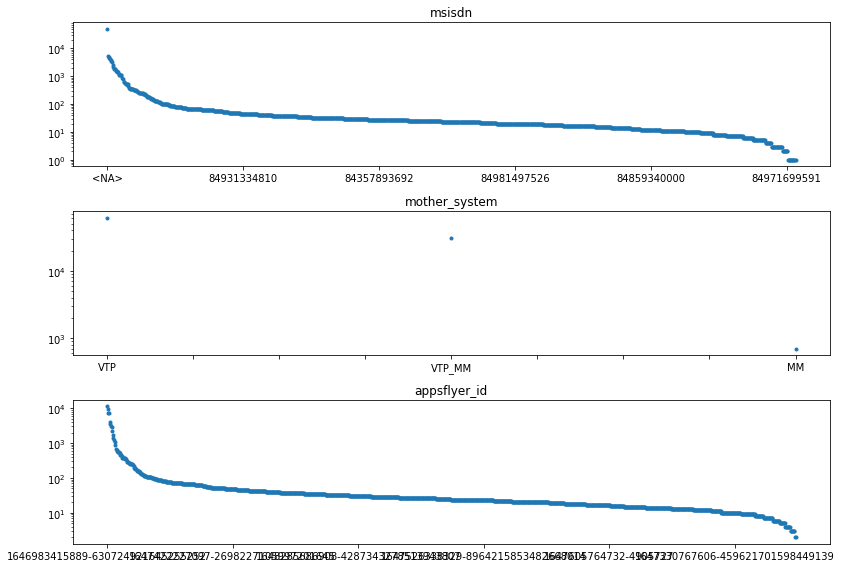

In [144]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))

# Identify non-numerical features
df_non_numerical = df_dataset.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)

plt.tight_layout();

## 3. Content Investigation

## 3.1 Feature distribution

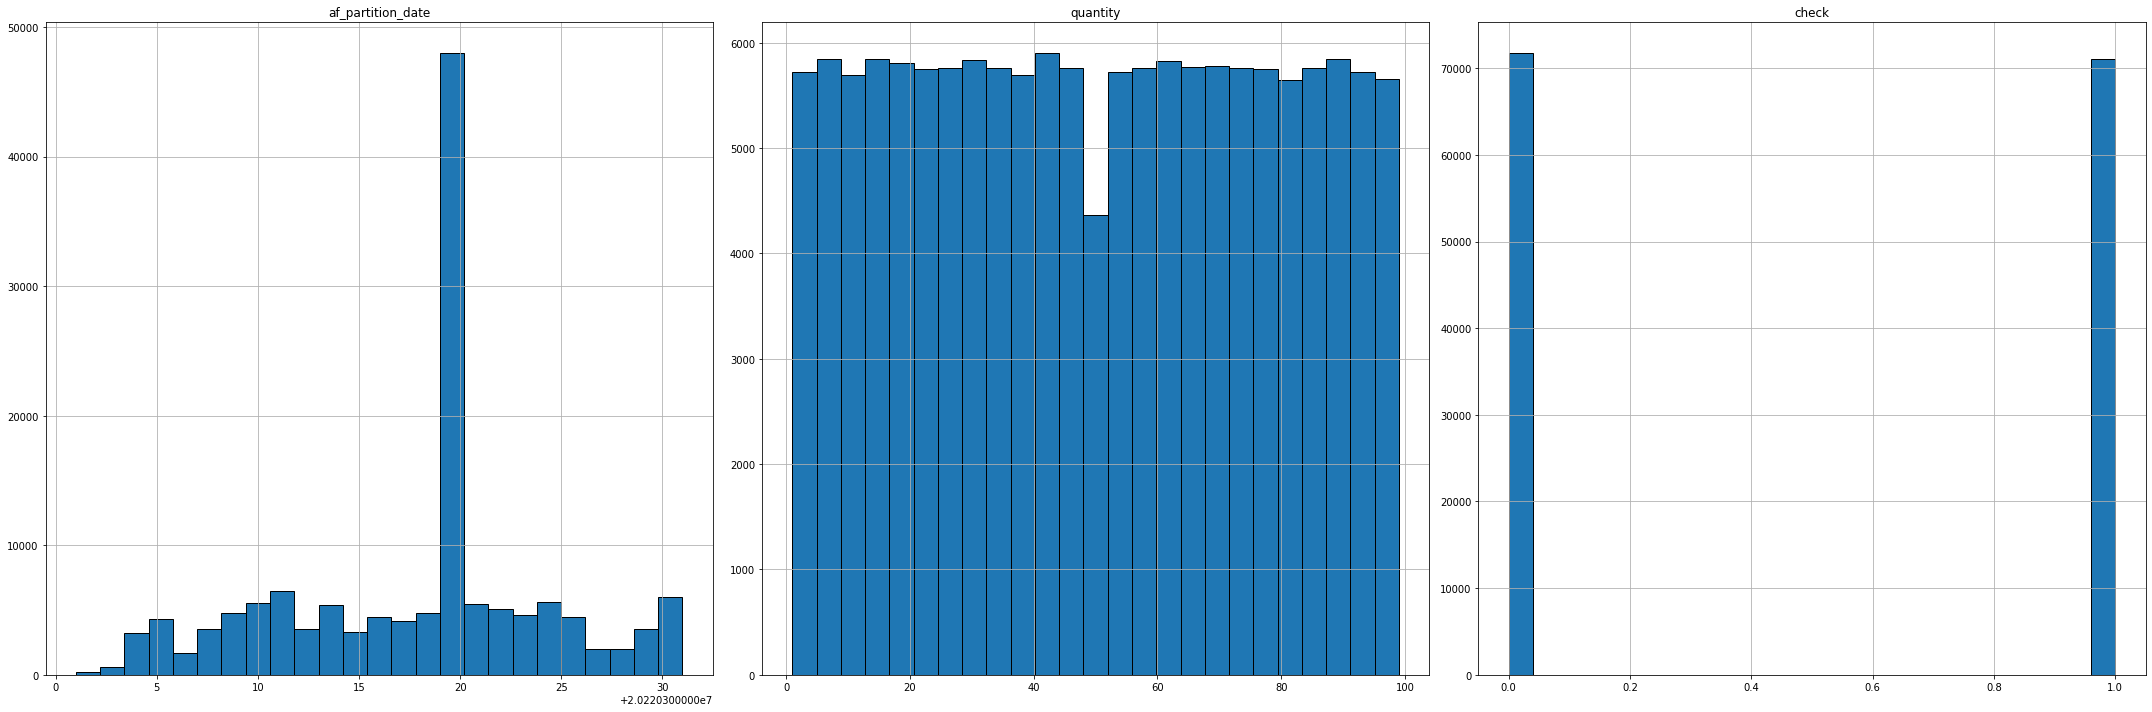

In [151]:
# Plots the histogram for each numerical feature in a separate subplot
df_dataset.hist(bins=25, figsize=(30, 10), layout=(-1, 3), edgecolor="black")
plt.tight_layout();

In [154]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_dataset.mode()
most_frequent_entry

,msisdn,mother_system,af_partition_date,appsflyer_id,af_adset,campaign,event_name,event_time,media_source,original_url,quantity,check
0,<NA>,VTP,20220319,1646983415889-630724921645255252,LANHNT_NDH_HKD,vtpost_bh,click,2022-03-19T22:02:53.000+07:00,BHTT,https://vtmoney.onelink.me/314y?pid=BHTT&c=vtp...,41,0


campaign         0.731175
check            0.502262
mother_system    0.431146
media_source     0.362845
msisdn           0.349936
dtype: float64

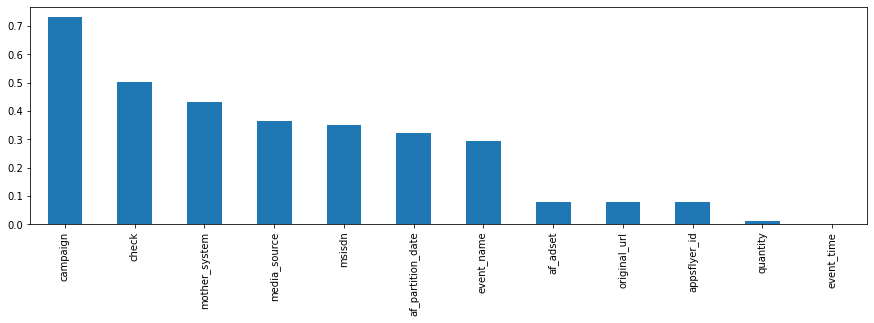

In [155]:
# Checks for each entry if it contains the most frequent entry
df_freq = df_dataset.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
display(df_freq.head())

# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4));

## 3.2. Feature patterns

## 3.2.1 Continuous features

In [158]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_dataset.select_dtypes(include="number").nunique() >= 25
cols_continuous

af_partition_date     True
quantity              True
check                False
dtype: bool

In [160]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_dataset[cols_continuous[cols_continuous].index]
df_continuous.shape

(142766, 2)

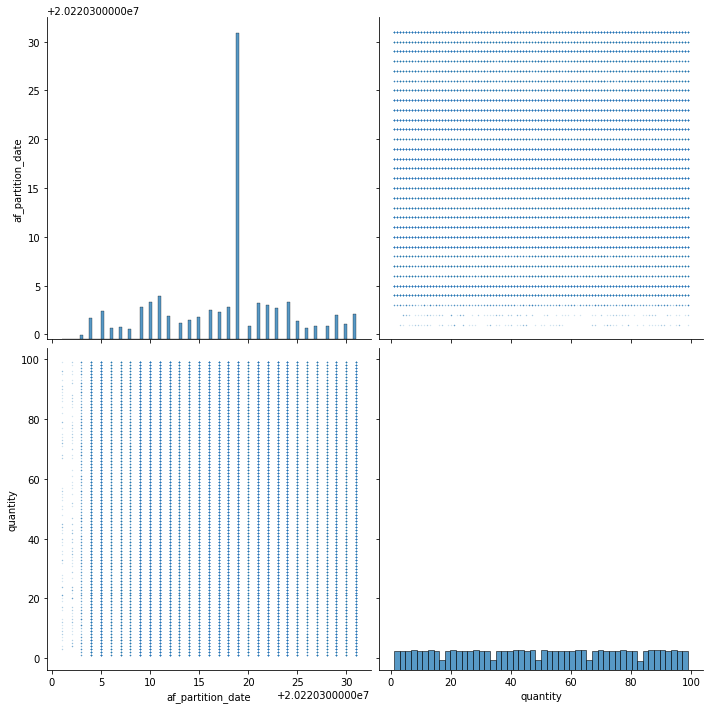

In [164]:
import seaborn as sns

sns.pairplot(df_continuous, height=5, plot_kws={"s": 2, "alpha": 0.2});

## 3.2.2. Discrete and ordinal feaures

In [165]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_dataset[cols_continuous[~cols_continuous].index]
df_discrete.shape

(142766, 1)

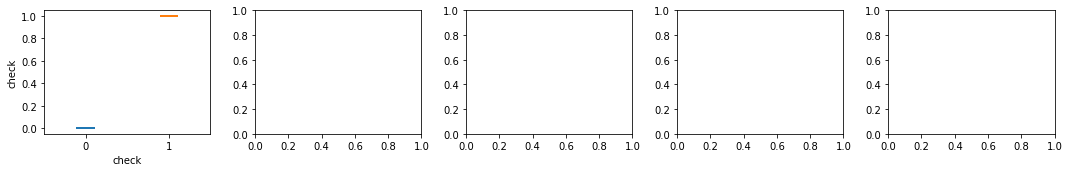

In [166]:
import numpy as np

# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = df_dataset["check"]

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_dataset, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

## 3.3. Features relationships

In [168]:
# Computes feature correlation
df_corr = df_dataset.corr(method="pearson")
df_corr

,af_partition_date,quantity,check
af_partition_date,1.000000,0.000961,0.001443
quantity,0.000961,1.000000,0.000541
check,0.001443,0.000541,1.000000


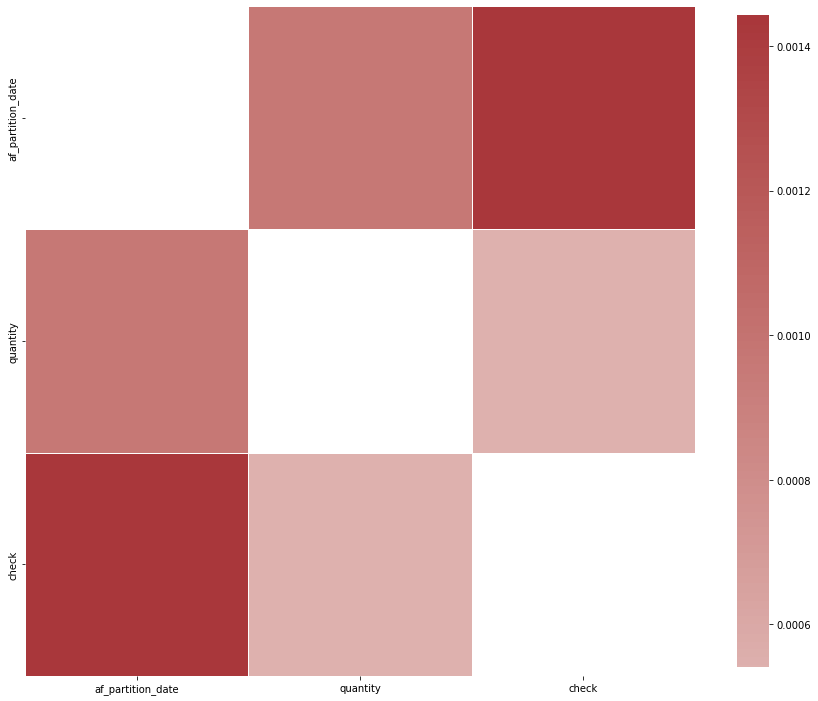

In [169]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [170]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

check     quantity             0.000541
quantity  af_partition_date    0.000961
check     af_partition_date    0.001443
dtype: float64